In [1]:
%autosave 10

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

from HW2Utils import *
from functools import cmp_to_key

Autosaving every 10 seconds


In [2]:
def getData(file):
    data = pd.read_table(file, sep=",") # area, rooms, price
    return data[['area', 'rooms']].as_matrix(), data['price'].as_matrix()

In [3]:
data, lables = getData('prices.txt')

In [4]:
max_area = max_rooms = 0
data, max_area, max_rooms = normalize_data(data)
data_for_training = [[1, d[0], d[1]] for d in data]

In [5]:
def calculate_error(data, lables, coefficients):
    alpha = 10 ** (-3)
    data_len = len(data)
    parameters_count = len(data[0])
    standart_deviation = 0
    for i in range(data_len):
        predicted = 0
        for j in range(parameters_count):
            predicted += coefficients[j] * data[i][j]
        error = predicted - lables[i]
        for j in range(parameters_count):
            coefficients[j] = coefficients[j] - alpha * error * data[i][j]
        standart_deviation += abs(error) ** 2
    standart_deviation = math.sqrt(standart_deviation / data_len)
    return standart_deviation, coefficients

In [6]:
def gradient_decent_training(data, lables):
    parameters_count = len(data[0])
    data_len = len(data)
    coefficients = [0. for i in range(parameters_count)]
    eps = 10 ** (-10)
    previos_standart_deviation = standart_deviation = 0
    errors_list = []
    while True:
        previos_standart_deviation = standart_deviation
        standart_deviation, coefficients = calculate_error(data, lables, coefficients)
        errors_list.append(standart_deviation)
        if abs(previos_standart_deviation - standart_deviation) < eps:
            break
    return standart_deviation, coefficients, errors_list

In [7]:
def genetic_training(data, lables):
    iterations = 2000
    vectors_count = 50
    parameters_count = len(data[0])
    data_len = len(data)
    init_err, init_coeffs = calculate_error(data, lables, [0. for i in range(parameters_count)])
    coefficients_list = [(init_coeffs, init_err)]
    errors_list = []
    for it in range(iterations):
        for i in range(len(coefficients_list)):
            new_coeffs = list(coefficients_list[i][0])
            for j in range(len(new_coeffs)):
                new_coeffs[j] += 5000 * (random.random() - 0.5)
            coefficients_list.append((new_coeffs, calculate_error(data, lables, new_coeffs)[0]))
            errors_list.append(coefficients_list[len(coefficients_list) - 1][1])
        coefficients_list = sorted(coefficients_list, key=cmp_to_key(lambda c1, c2: c1[1] - c2[1]))
        coefficients_list = coefficients_list[:vectors_count]
    return calculate_error(data, lables, coefficients_list[0][0]), errors_list

In [8]:
print('GRADIENT DECENT TRAINING')
standart_deviation, coefficients, gradient_errors_list = gradient_decent_training(data_for_training, lables)
print('Standart deviation:', standart_deviation)
print('Coefficients:', coefficients)
print('Resulted equation:', 'price = (' + str(coefficients[1]) + ') * area + (' + str(coefficients[2]) + ') * rooms + (' + str(coefficients[0]) + ')')

GRADIENT DECENT TRAINING
Standart deviation: 63980.71832156323
Coefficients: [89412.526968578386, 623124.69192320656, -43451.034714190369]
Resulted equation: price = (623124.691923) * area + (-43451.0347142) * rooms + (89412.5269686)


In [9]:
print('GENETIC TRAINING')
(genetic_standart_deviation, genetic_coefficients), genetic_errors_list = genetic_training(data_for_training, lables)
print('Standart deviation:', genetic_standart_deviation)
print('Coefficients:', genetic_coefficients)
print('Resulted equation:', 'price = (' + str(genetic_coefficients[1]) + ') * area + (' + str(genetic_coefficients[2]) + ') * rooms + (' + str(genetic_coefficients[0]) + ')')

GENETIC TRAINING
Standart deviation: 63980.53458653141
Coefficients: [89553.96655837576, 623357.19105624873, -43627.059957543475]
Resulted equation: price = (623357.191056) * area + (-43627.0599575) * rooms + (89553.9665584)


In [10]:
costs = pd.DataFrame(columns=['Area', 'Rooms', 'Price', 'Predicted Price (Gradient decent)', 'Predicted price (Genetic)'])
for i in range(len(data)):
    predicted_gradient = coefficients[0] + coefficients[1] * data[i][0] + coefficients[2] * data[i][1]
    predicted_genetic = genetic_coefficients[0] + genetic_coefficients[1] * data[i][0] + genetic_coefficients[2] * data[i][1]
    result = pd.DataFrame([[data[i][0] * max_area, data[i][1] * max_rooms, lables[i], predicted_gradient, predicted_genetic]], columns=['Area', 'Rooms', 'Price', 'Predicted Price (Gradient decent)', 'Predicted price (Genetic)'])
    costs = costs.append(result, ignore_index=True)

In [11]:
# display result values
costs

,Area,Rooms,Price,Predicted Price (Gradient decent),Predicted price (Genetic)
0,2104.0,3.0,399900.0,356118.670724,356263.735493
1,1600.0,3.0,329900.0,285985.833580,286104.730515
2,2400.0,3.0,369000.0,397307.797300,397468.230480
3,1416.0,2.0,232000.0,269071.988867,269216.537514
4,3000.0,4.0,539900.0,472109.063148,472265.443463
5,1985.0,4.0,299900.0,330869.321678,330973.002881
6,1534.0,3.0,314900.0,276801.771573,276917.241767
7,1427.0,3.0,198999.0,261912.458926,262022.373647
8,1380.0,3.0,212000.0,255372.293557,255479.768024
9,1494.0,3.0,242500.0,271235.673387,271349.066769


In [12]:
def predict(area, rooms, isGradient):
    area = area / max_area
    rooms = rooms / max_rooms
    curr_coefficients = []
    if isGradient:
        curr_coefficients = coefficients
    else:
        curr_coefficients = genetic_coefficients
    return curr_coefficients[0] + curr_coefficients[1] * area + curr_coefficients[2] * rooms

In [13]:
# for testing coefficients
area = 3000
rooms = 3
print(predict(area, rooms, True))

480799.27009


In [14]:
area = 3000
rooms = 3
print(predict(area, rooms, False))

480990.855454


In [15]:
print(len(genetic_errors_list))
print(len(gradient_errors_list))

99763
36517


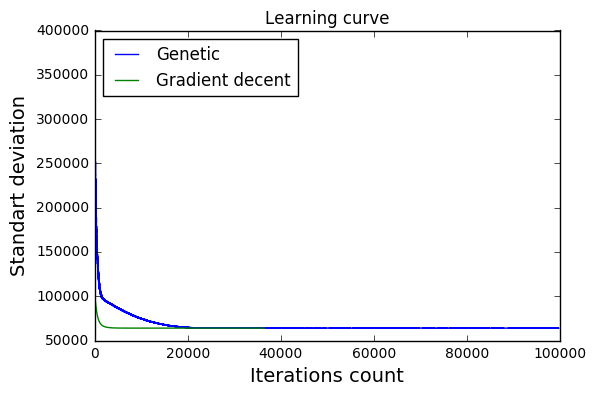

In [16]:
fig, ax = plt.subplots()

ax.plot(range(len(genetic_errors_list)), genetic_errors_list, label=r"Genetic")
ax.plot(range(len(gradient_errors_list)), gradient_errors_list, label=r"Gradient decent")
ax.set_xlabel(r'Iterations count', fontsize=14)
ax.set_ylabel(r'Standart deviation', fontsize=14)
ax.set_title('Learning curve')
ax.legend(loc=2);

plt.show()